# Data Scientist Technical Test

The purpose of this data scienct project is to write a functional and structured code in python using a jupyter notebook, to make a prediction on the provided dataset. The dataset is based on a Kaggle competition (https://www.kaggle.com/c/auto-insurance-fall-2017). It contains insurance claim statistics on the customers.

The target to be predicted is `TARGET_FLAG`. 
The provided dataset is divided in two files: one for the training, design and tuning of models `train_auto.csv` (with targets), and one for the final predictions `test_auto.csv` (with no target provided).

- In a first part, we will load and explore the data to get a brief overview of the problem to be solved. 
- We will also make appropriate transformations for our data to be suitable for learning algorithms. 
- Then, we will compare the performance of different algorithms on this data, using accurate metrics that we will discuss.


## Load the data

First, we import the necessary libraries and load the data using `pandas`.

### Setup: Load libraries and data files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
!git clone https://github.com/descartes-underwriting/data-scientist-technical-test.git
path_train = 'data-scientist-technical-test/data/auto-insurance-fall-2017/train_auto.csv'
path_test = 'data-scientist-technical-test/data/auto-insurance-fall-2017/test_auto.csv'

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

fatal: destination path 'data-scientist-technical-test' already exists and is not an empty directory.


We will begin by exploring the train data, and keep the test data apart for the moment (in order not to bias our models for the final evaluations). Let us take a look at some instances and general info:

### First explorations

In [3]:
pd.set_option('display.max_columns', 30)
df_train.head(10)

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,36,Private,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban
5,7,1,2946.0,0,34.0,1,12.0,"$125,301",Yes,$0,z_No,z_F,Bachelors,z_Blue Collar,46,Commercial,"$17,430",1,Sports Car,no,$0,0,No,0,7.0,Highly Urban/ Urban
6,8,0,0.0,0,54.0,0,NaN,"$18,755",No,NaN,Yes,z_F,<High School,z_Blue Collar,33,Private,"$8,780",1,z_SUV,no,$0,0,No,0,1.0,Highly Urban/ Urban
7,11,1,4021.0,1,37.0,2,NaN,"$107,961",No,"$333,680",Yes,M,Bachelors,z_Blue Collar,44,Commercial,"$16,970",1,Van,yes,"$2,374",1,Yes,10,7.0,Highly Urban/ Urban
8,12,1,2501.0,0,34.0,0,10.0,"$62,978",No,$0,z_No,z_F,Bachelors,Clerical,34,Private,"$11,200",1,z_SUV,no,$0,0,No,0,1.0,Highly Urban/ Urban
9,13,0,0.0,0,50.0,0,7.0,"$106,952",No,$0,z_No,M,Bachelors,Professional,48,Commercial,"$18,510",7,Van,no,$0,0,No,1,17.0,z_Highly Rural/ Rural


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        8161 non-null   int64  
 1   TARGET_FLAG  8161 non-null   int64  
 2   TARGET_AMT   8161 non-null   float64
 3   KIDSDRIV     8161 non-null   int64  
 4   AGE          8155 non-null   float64
 5   HOMEKIDS     8161 non-null   int64  
 6   YOJ          7707 non-null   float64
 7   INCOME       7716 non-null   object 
 8   PARENT1      8161 non-null   object 
 9   HOME_VAL     7697 non-null   object 
 10  MSTATUS      8161 non-null   object 
 11  SEX          8161 non-null   object 
 12  EDUCATION    8161 non-null   object 
 13  JOB          7635 non-null   object 
 14  TRAVTIME     8161 non-null   int64  
 15  CAR_USE      8161 non-null   object 
 16  BLUEBOOK     8161 non-null   object 
 17  TIF          8161 non-null   int64  
 18  CAR_TYPE     8161 non-null   object 
 19  RED_CA

The training dataset has 8161 instances.

We have 23 attributes in the data (excluding `INDEX` and the two `TARGET` labels), including objects (strings), integers and floats:

- 6 integer attributes (`KIDSDRIV`, `HOMEKIDS`, `TRAVTIME`, `TIF`, `CLM_FREQ`,`MVR_PTS`)

- 3 float attributes (`AGE`,`YOJ`,`CAR_AGE`)

- 10 "object" attributes which seem to be categorial (`PARENT1`, `MSTATUS`, `SEX`, `EDUCATION`, `JOB`,`CAR_USE`,`CAR_TYPE`,`RED_CAR`, `REVOKED`, `URBANICITY`). 

- 4 "object" attributes which are amounts in dollars and **should be converted back to a float type** (`INCOME`,`HOME_VAL`, `BLUEBOOK`, `OLDCLAIM`)


In [5]:
for key in ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM']:
  df_train[key] = df_train[key].str.replace('$','')
  df_train[key] = df_train[key].str.replace(',','.').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


We can check which categorial features are binary and which one contain more labels:

In [6]:
categorial_attributes = ['PARENT1','MSTATUS','SEX','EDUCATION','JOB','CAR_USE','CAR_TYPE','RED_CAR','REVOKED','URBANICITY']
binary_attributes = []
multiclass_attributes = []

for attribute in categorial_attributes:
  assert len(df_train[attribute].unique()) > 1 #Ensure that there is no constant feature
  if len(df_train[attribute].unique()) == 2:
    binary_attributes.append(attribute)
  else:
    multiclass_attributes.append(attribute)

print("Binary:", binary_attributes)
print("Multiclass:", multiclass_attributes)

Binary: ['PARENT1', 'MSTATUS', 'SEX', 'CAR_USE', 'RED_CAR', 'REVOKED', 'URBANICITY']
Multiclass: ['EDUCATION', 'JOB', 'CAR_TYPE']


Also, five rows (`YOJ,INCOME,HOME_VAL,JOB,CAR_AGE`) seem to have **missing or null values**. 

There can be different explanations for these missing values:
- it could be that the feature is not relevant for these clients (e.g. no income, no job, not homeowner, or no car yet)
- also, the information could just be missing and/or not disclaimed.

In order not to indrocude potential biases in the training, we will fill the missing numerical values with the mean given by the ones that are present, and the missing categorical values will be considered as a category among others.

We will deal with these before the learning phase and keep them as is for the moment.


Now do some small checks:

In [7]:
print("INDEX contains unique values:", len(df_train['INDEX'].unique()) == len(df_train['INDEX']))
print("TARGET_FLAG values:", df_train['TARGET_FLAG'].unique())
print("TARGET_AMT values when TARGET_FLAG is 0:", df_train[df_train['TARGET_FLAG'] == 0]['TARGET_AMT'].unique())
print("TARGET_AMT minimum value when TARGET_FLAG is 1:", np.min(df_train[df_train['TARGET_FLAG'] == 1]['TARGET_AMT'].unique()))

INDEX contains unique values: True
TARGET_FLAG values: [0 1]
TARGET_AMT values when TARGET_FLAG is 0: [0.]
TARGET_AMT minimum value when TARGET_FLAG is 1: 30.277280146


As confirmed by the cell above, the `INDEX` column contains only a unique identifier for each data instance, and we can consider that this information won't be relevant for our models (it could even introduce undesired biases). Thus, **we can safely drop it**.

Also, the `TARGET_FLAG` variable that we aim at predicting is a **binary variable, which means our task is a classification problem**.

Finally, the `TARGET_AMT` fully determines the value of `TARGET_FLAG` (1 if and only if `TARGET_AMT` is positive), and we will discard both these attributes from the input data since `TARGET_FLAG` is the variable to predict here.

Note that we keep these last two for the moment and will discard them after we perform a train/validation split.

In [8]:
df_train = df_train.drop(columns=['INDEX'])
df_train.describe()

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
count,8161.000000,8161.000000,8161.000000,8155.000000,8161.000000,7707.000000,7716.000000,7697.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,7651.000000
mean,0.263816,1504.324648,0.171057,44.790313,0.721235,10.499286,64.757855,154.867290,33.485725,15.709900,5.351305,13.313173,0.798554,1.695503,8.328323
std,0.440728,4704.026930,0.511534,8.627589,1.116323,4.092474,60.768449,129.123775,15.908333,8.419734,4.146635,85.538813,1.158453,2.147112,5.700742
min,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.500000,1.000000,0.000000,0.000000,0.000000,-3.000000
25%,0.000000,0.000000,0.000000,39.000000,0.000000,9.000000,28.696250,0.000000,22.000000,9.280000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,45.000000,0.000000,11.000000,54.799500,161.160000,33.000000,14.440000,4.000000,0.000000,0.000000,1.000000,8.000000
75%,1.000000,1036.000000,0.000000,51.000000,1.000000,13.000000,87.259000,238.724000,44.000000,20.850000,7.000000,4.906000,2.000000,3.000000,12.000000
max,1.000000,107586.136160,4.000000,81.000000,5.000000,23.000000,997.000000,885.282000,142.000000,69.740000,25.000000,999.000000,5.000000,13.000000,28.000000


The `.describe()` method allows to take a look at the distribution of the numerical features we have.

We can notice that we seem to have probable outliers, for instance in the `CAR_AGE` vatiable (-3 value), but overall the number seem fairly reasonnable (kids between 0 and 5, age between 16 and 81, ...)

Most importantly, we notice - as expected - that the positive rate of `TARGET_FLAG` is at $26.3\%$. 

This means that the target is really unbalanced and we should keep that in mind for approripate metrics.

We can also get an overview of the distribution of numerical features.

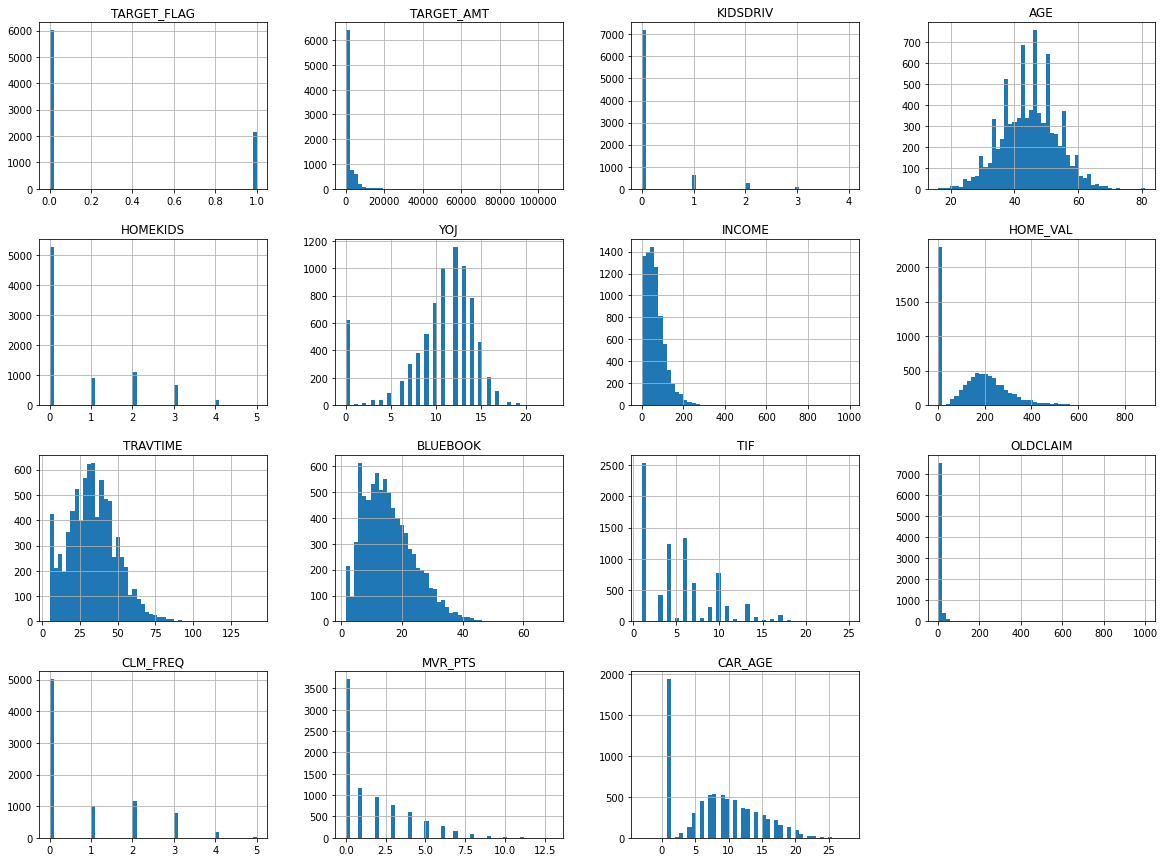

In [9]:
df_train.hist(bins=50, figsize=(20,15))
plt.show()

## Transform the data

Here we build a pre-processing pipeline that pre-processes the raw data and returns a dataset ready to be fed to the ML model. Let's load the original train set.

In [10]:
df_train_ = df_train.copy()

First we take the labels away to separate them from the training features.

In [11]:
df_features = df_train_.drop(columns=['TARGET_FLAG',"TARGET_AMT"])
df_labels = df_train_["TARGET_FLAG"].copy()

In [12]:
df_features.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,60.0,0,11.0,67.349,No,0.000,z_No,M,PhD,Professional,14,Private,14.23,11,Minivan,yes,4.461,2,No,3,18.0,Highly Urban/ Urban
1,0,43.0,0,11.0,91.449,No,257.252,z_No,M,z_High School,z_Blue Collar,22,Commercial,14.94,1,Minivan,yes,0.000,0,No,0,1.0,Highly Urban/ Urban
2,0,35.0,1,10.0,16.039,No,124.191,Yes,z_F,z_High School,Clerical,5,Private,4.01,4,z_SUV,no,38.690,2,No,3,10.0,Highly Urban/ Urban
3,0,51.0,0,14.0,NaN,No,306.251,Yes,M,<High School,z_Blue Collar,32,Private,15.44,7,Minivan,yes,0.000,0,No,0,6.0,Highly Urban/ Urban
4,0,50.0,0,NaN,114.986,No,243.925,Yes,z_F,PhD,Doctor,36,Private,18.00,1,z_SUV,no,19.217,2,Yes,3,17.0,Highly Urban/ Urban


We are now converting to apply different transformations for the different type of input features:
- For the numerical attributes, we replace the `NaN` or missing values by a reasonnable value, here the median of the column. We also scale these values using a `StandardScaler` object.
- For the binary ones, we can convert the values to 0 and 1. 
- For the categorial attributes with more than two classes, we don't want to create an effect of distance between them. Therefore, we are going to use 'One Hot Encoding'.


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

class BinClassToNum(BaseEstimator, TransformerMixin):
  def __init__(self,columns):
    self.columns = columns

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    for column in self.columns :
      X[column] = LabelEncoder().fit_transform(X[column])
    return X

In [14]:
numerical_attributes = [attribute for attribute in df_features.keys() if (attribute not in binary_attributes) and (attribute not in multiclass_attributes)]

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy ="mean")),('scaler', StandardScaler())])
bin_pipeline = BinClassToNum(binary_attributes)
cat_pipeline = OneHotEncoder()

full_pipeline = ColumnTransformer([('num',num_pipeline, numerical_attributes),
                                   ('bin',bin_pipeline,binary_attributes),
                                   ('cat',cat_pipeline, multiclass_attributes),])

df_prepared = full_pipeline.fit_transform(df_features)

In [15]:
df_prepared[0:5]

array([[-3.34421403e-01,  1.76366928e+00, -6.46120475e-01,
         1.25910126e-01,  4.38548139e-02, -1.23507305e+00,
        -1.22495036e+00, -1.75776359e-01,  1.36231925e+00,
        -1.03493544e-01,  1.03717617e+00,  6.07596196e-01,
         1.75231158e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-3.34421403e-01, -2.07599238e-01, -6.46120475e-01,
         1.25910126e-01,  4.51744399e-01,  8.16522304e-01,
        -7.22038459e-01, -9.14454885e-02, -1.04942231e+00,
        -1.55648503e-01, -6.89

In [16]:
df_labels_prepared = np.asarray(df_labels)
df_labels_prepared

array([0, 0, 0, ..., 0, 0, 0])

## Discussion about the metrics

### Problem to be solved

This project is about a binary classification problem. Our goal is to find a good classifier $f : X \rightarrow  [0,1]$ where $X$ is our feature space, and $[0,1]$ is the label space.

As seen during the exploration phase, the label distribution is unbalanced : around $26\%$. This has to be taken into account when it comes to finding a good metrics.

### Accuracy

For example the accuracy defined by 

\begin{equation}
\mathrm{Accuracy} = \frac{1}{n}\sum\mathbb{1}_{\mathrm{f}(x_i) = y_i}
\end{equation}

would give us a score about $74\%$ on a naïve classifier that would always predict $0$, which is obviously bad. Therefore, the accuracy won't be a good metric choice.

### Precision, Recall, F1 Score

We can introcude the notions of **precision** and **recall**.
The **precision** measures how many positive predictions are indeed positive, and the **recall** measures how many positive instances are indeed detected.

Formally : $Precision = \frac{TP}{TP + FP}$ and $Recall = \frac{TP}{TP + FN}$ where $TP$ is the number of True Positives, $FP$ is the number of False Positives and $FN$ is the number of False Negatives.

We can also combine those two metrics into a single indicator, namelly the $F_1$ score which is the harmonic mean between precision and recall. As the harmonic mean gives a lot of weight for the low values, both precision and recall have to be high to reach a good $F_1$ score.

The $F_1$ score is clearly a better metrics than the simple accuracy, as it takes into account both precision and recall. However, it supposes that we give the same importance between the two. 

### Precision-Recall Tradeoff, ROC Curve

Some problems may favor the precision or the recall depending on the task. For instance, if you want to make sure to detect all potential problematic instances (e.g. terrorist threats), the recall is important. If you want to identify some interesting elements among others and make sure that what you detect is relevant (e.g. good investments), you might favor the precision. For the real life needs of our problem, that is auto insurance, we are both interested in the recall and the precision.

Therefore, a good Precision-Recall tradeoff has to be found. A good way to look at this trade-off is the **ROC curve** which displays the interaction between the two metrics. 

The area under the ROC curve, namely the **ROC AUC**, indicates how robust our classifier is under different detection thresholds. A completely random classifier would lead to a **ROC AUC** around $0.5$.

## Model Selection

Now that we have preprocessed our data to be suitable for our models, let's compare different ones. We are going to try the following models :

*   Logistic regression
*   Gradient Boosting Classifier
*   Random Forest


In order to avoid overfitting, we will perform **5-fold cross validation on the train set**, select our model based on this, and then make our predictions on the final test set.

In [17]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import f1_score,roc_auc_score,average_precision_score

kf = StratifiedKFold(n_splits=5, shuffle=True)

np.random.seed(seed=0)

### Logistic regression

In [18]:
f1_scores = []
roc_auc_scores = []

for index, (train_index, test_index) in enumerate(kf.split(df_prepared,df_labels_prepared)):
  X_train,X_val = df_prepared[train_index], df_prepared[test_index]
  y_train,y_val = df_labels_prepared[train_index], df_labels_prepared[test_index]

  clf = LogisticRegression()
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_val)
  y_prob = clf.predict_proba(X_val)
  print("Fold n°",index+1)
  print("F1 Score : " + f1_score(y_val,y_pred).astype(str))
  print("ROC AUC Score : " + roc_auc_score(y_val,y_prob[:,1]).astype(str))

  f1_scores.append(f1_score(y_val,y_pred))
  roc_auc_scores.append(roc_auc_score(y_val,y_prob[:,1]))

print("\nCV Finished. Final results :\n")

print("Mean F1 Score :",np.mean(f1_scores), "+/-",np.std(f1_scores))
print("Mean ROC AUC Score :",np.mean(roc_auc_scores), "+/-",np.std(roc_auc_scores))


Fold n° 1
F1 Score : 0.5235294117647058
ROC AUC Score : 0.8335527407916427
Fold n° 2
F1 Score : 0.5372714486638538
ROC AUC Score : 0.8070405912626244
Fold n° 3
F1 Score : 0.4782608695652174
ROC AUC Score : 0.8043416012072901
Fold n° 4
F1 Score : 0.4909847434119279
ROC AUC Score : 0.7912876160817262
Fold n° 5
F1 Score : 0.5063291139240507
ROC AUC Score : 0.7984799982999473

CV Finished. Final results :

Mean F1 Score : 0.507275117465951 +/- 0.021317034311795394
Mean ROC AUC Score : 0.8069405095286462 +/- 0.014363624313682589


We already have some results, with a mean ROC AUC around $0.8$. We can try to plot the validation scores as fonction of the regularization to select a model, using a gaussian interval method (i.e. select the simplest model whose validation scores falls into the confidence interval of the model having the smallest CV error).

First, we will try the Lasso regularization.

In [19]:
list_C = np.logspace(-3, 2, 25)
f1_scores_list = []
f1_std_list = []
roc_auc_scores_list = []
roc_auc_std_list = []
for C in list_C:
  f1_scores = []
  roc_auc_scores = []

  for index, (train_index, test_index) in enumerate(kf.split(df_prepared,df_labels_prepared)):
    X_train,X_val = df_prepared[train_index], df_prepared[test_index]
    y_train,y_val = df_labels_prepared[train_index], df_labels_prepared[test_index]

    clf = LogisticRegression(penalty="l2", C=C)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_val)
    y_prob = clf.predict_proba(X_val)

    f1_scores.append(f1_score(y_val,y_pred))
    roc_auc_scores.append(roc_auc_score(y_val,y_prob[:,1]))
    
  f1_scores_list.append(np.mean(f1_scores))
  f1_std_list.append(np.std(f1_scores))
  roc_auc_scores_list.append(np.mean(roc_auc_scores))
  roc_auc_std_list.append(np.std(roc_auc_scores))

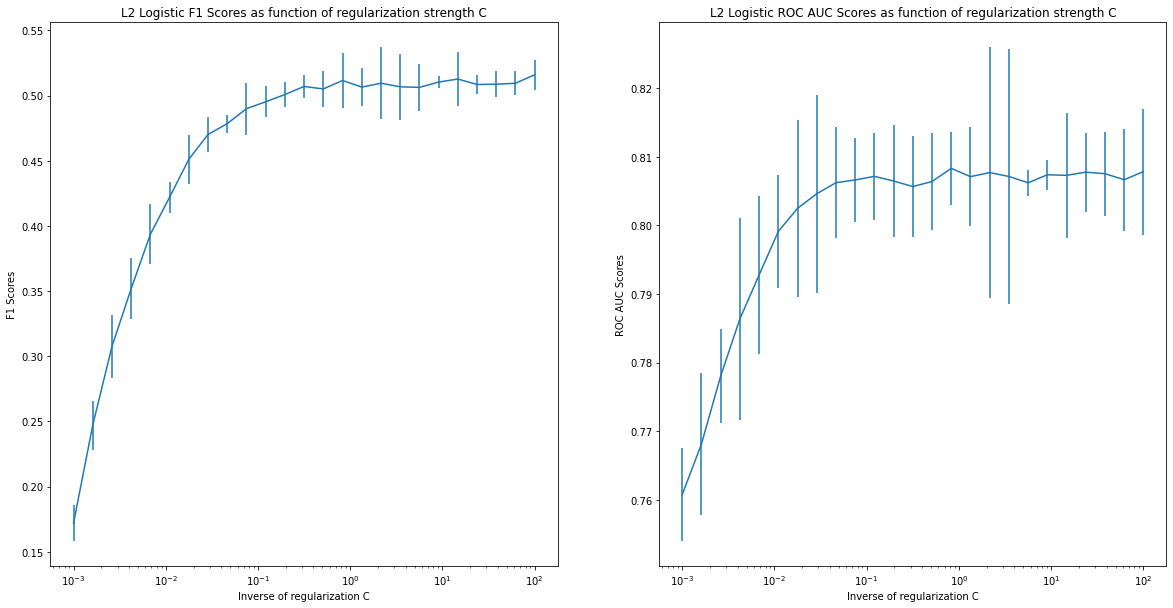

In [20]:
fig = plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.errorbar(list_C, f1_scores_list, yerr = f1_std_list)
plt.xscale("log")
plt.xlabel("Inverse of regularization C")
plt.ylabel("F1 Scores")
plt.title("L2 Logistic F1 Scores as function of regularization strength C")
plt.subplot(1,2,2)
plt.errorbar(list_C, roc_auc_scores_list, yerr = roc_auc_std_list)
plt.xscale("log")
plt.xlabel("Inverse of regularization C")
plt.ylabel("ROC AUC Scores")
plt.title("L2 Logistic ROC AUC Scores as function of regularization strength C")
plt.show()

Based on this graph, we can notice that both the F1 and ROC AUC score improve and stagnate from a certain point $C_0$. 

We would choose a value around this point to set the regularization, namely $C_0 = 0.5$, which yields a F1 score around $0.51$ and an AUC-ROC slightly above $0.80$.

We will now try the Ridge regularization.

In [21]:
list_C = np.logspace(-3, 2, 25)
f1_scores_list = []
f1_std_list = []
roc_auc_scores_list = []
roc_auc_std_list = []
for C in list_C:
  f1_scores = []
  roc_auc_scores = []

  for index, (train_index, test_index) in enumerate(kf.split(df_prepared,df_labels_prepared)):
    X_train,X_val = df_prepared[train_index], df_prepared[test_index]
    y_train,y_val = df_labels_prepared[train_index], df_labels_prepared[test_index]

    clf = LogisticRegression(penalty="l1", C=C, solver = "saga",tol=1e-3)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_val)
    y_prob = clf.predict_proba(X_val)

    f1_scores.append(f1_score(y_val,y_pred))
    roc_auc_scores.append(roc_auc_score(y_val,y_prob[:,1]))
    
  f1_scores_list.append(np.mean(f1_scores))
  f1_std_list.append(np.std(f1_scores))
  roc_auc_scores_list.append(np.mean(roc_auc_scores))
  roc_auc_std_list.append(np.std(roc_auc_scores))

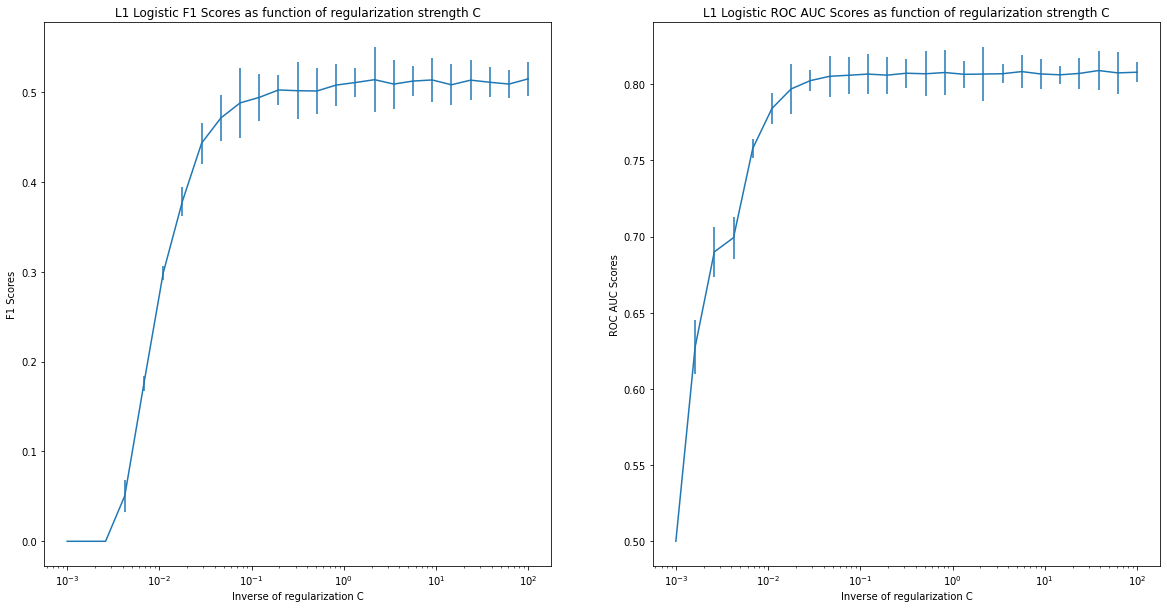

In [22]:
fig = plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.errorbar(list_C, f1_scores_list, yerr = f1_std_list)
plt.xscale("log")
plt.xlabel("Inverse of regularization C")
plt.ylabel("F1 Scores")
plt.title("L1 Logistic F1 Scores as function of regularization strength C")
plt.subplot(1,2,2)
plt.errorbar(list_C, roc_auc_scores_list, yerr = roc_auc_std_list)
plt.xscale("log")
plt.xlabel("Inverse of regularization C")
plt.ylabel("ROC AUC Scores")
plt.title("L1 Logistic ROC AUC Scores as function of regularization strength C")
plt.show()

The results are pretty similar than with Lasso regularization, but the models did not converge easily and we had to augment the tolerence threshold for convergence. Hence, we select the Lasso Regularization for the moment and move forward.



### Gradient Boosting

We will now fit a gradient boosting model and compare it to the logistic one we selected.

In [23]:
f1_scores = []
roc_auc_scores = []

for index, (train_index, test_index) in enumerate(kf.split(df_prepared,df_labels_prepared)):
  X_train,X_val = df_prepared[train_index], df_prepared[test_index]
  y_train,y_val = df_labels_prepared[train_index], df_labels_prepared[test_index]

  clf = GradientBoostingClassifier()
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_val)
  y_prob = clf.predict_proba(X_val)
  print("Fold n°",index+1)
  print("F1 Score : " + f1_score(y_val,y_pred).astype(str))
  print("ROC AUC Score : " + roc_auc_score(y_val,y_prob[:,1]).astype(str))

  f1_scores.append(f1_score(y_val,y_pred))
  roc_auc_scores.append(roc_auc_score(y_val,y_prob[:,1]))

print("\nCV Finished. Final results :\n")

print("Mean F1 Score :",np.mean(f1_scores), "+/-",np.std(f1_scores))
print("Mean ROC AUC Score :",np.mean(roc_auc_scores), "+/-",np.std(roc_auc_scores))

Fold n° 1
F1 Score : 0.5028735632183907
ROC AUC Score : 0.809553682763839
Fold n° 2
F1 Score : 0.49927431059506533
ROC AUC Score : 0.830507294044809
Fold n° 3
F1 Score : 0.4914772727272727
ROC AUC Score : 0.8074178694424021
Fold n° 4
F1 Score : 0.5572842998585573
ROC AUC Score : 0.8315750022699568
Fold n° 5
F1 Score : 0.5252525252525253
ROC AUC Score : 0.8184768686574028

CV Finished. Final results :

Mean F1 Score : 0.5152323943303623 +/- 0.023834734013972493
Mean ROC AUC Score : 0.8195061434356818 +/- 0.010128375155144488


With the default hyperparameters, the F1 and AUC score do not look significantly better with a gradient boosting that with the previous model. We would need to tune these hyperparameters to obtain better scores, so we perform a grid search.


In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [20, 50, 100, 300], 'learning_rate': [0.05, 0.1, 0.2, 0.5]}] #These will be the parameters that we try
clf = GradientBoostingClassifier()
grid_search = GridSearchCV(clf, param_grid, scoring = ["f1","roc_auc"], cv=5, return_train_score=True, verbose = 1, refit="roc_auc") #This is a grid_search object
grid_search.fit(df_prepared, df_labels_prepared) # We plan to have 80 rounds of training! It takes quite a long time.

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.05, 0.1, 0.2, 0.5],
                          'n_estimators': [20, 50, 100, 300]}],
             refit='roc_auc', return_train_score=True,
             scoring=['f1', 'roc_auc'], verbose=1)

In [25]:
# This gives the best parameters
print("Best hyperparameters found:", grid_search.best_params_)
# This gives all the results
cvres = grid_search.cv_results_

print("F1", "||", "AUC", "||", "Params")
for mean_test_f1, std_test_f1, mean_test_roc_auc, std_test_roc_auc, params in zip(cvres["mean_test_f1"], cvres["std_test_f1"], cvres["mean_test_roc_auc"], cvres["std_test_roc_auc"], cvres["params"]):
  print(mean_test_f1, "+-", std_test_f1, "||", mean_test_roc_auc, "+-", std_test_roc_auc, "||", params)

Best hyperparameters found: {'learning_rate': 0.1, 'n_estimators': 100}
F1 || AUC || Params
0.025497908250201828 +- 0.010421606109126494 || 0.7785069551947483 +- 0.008117178273559332 || {'learning_rate': 0.05, 'n_estimators': 20}
0.286889011842575 +- 0.02687150257417175 || 0.8019351485366044 +- 0.010878246249351952 || {'learning_rate': 0.05, 'n_estimators': 50}
0.43983748009011325 +- 0.03617517130588225 || 0.8148563355211238 +- 0.012170992514255206 || {'learning_rate': 0.05, 'n_estimators': 100}
0.5274658515081958 +- 0.026861699808562914 || 0.8200861363683151 +- 0.01409387988180538 || {'learning_rate': 0.05, 'n_estimators': 300}
0.227459625530165 +- 0.023465701908182153 || 0.7966930004682938 +- 0.011585834158189217 || {'learning_rate': 0.1, 'n_estimators': 20}
0.4450453202010515 +- 0.03475831420837751 || 0.8147180983754605 +- 0.011840658552770958 || {'learning_rate': 0.1, 'n_estimators': 50}
0.5099569575576894 +- 0.03437428454955022 || 0.8202786317972999 +- 0.012941786535733026 || {'le

Based on these results, we would select the model 8 which has a learning rate $r=0.1$ and a number of estimators $n=300$.

The scores we have are thus: 

$F1 = 0.54 \pm 0.02$ and 
$AUC = 0.82 \pm 0.01$

### Random Forest

Finally, we can try a random forest with different parameters.

In [26]:
f1_scores = []
roc_auc_scores = []

for index, (train_index, test_index) in enumerate(kf.split(df_prepared,df_labels_prepared)):
  X_train,X_val = df_prepared[train_index], df_prepared[test_index]
  y_train,y_val = df_labels_prepared[train_index], df_labels_prepared[test_index]

  clf = RandomForestClassifier()
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_val)
  y_prob = clf.predict_proba(X_val)
  print("Fold n°",index+1)
  print("F1 Score : " + f1_score(y_val,y_pred).astype(str))
  print("ROC AUC Score : " + roc_auc_score(y_val,y_prob[:,1]).astype(str))

  f1_scores.append(f1_score(y_val,y_pred))
  roc_auc_scores.append(roc_auc_score(y_val,y_prob[:,1]))

print("\nCV Finished. Final results :\n")

print("Mean F1 Score :",np.mean(f1_scores), "+/-",np.std(f1_scores))
print("Mean ROC AUC Score :",np.mean(roc_auc_scores), "+/-",np.std(roc_auc_scores))

Fold n° 1
F1 Score : 0.44514106583072105
ROC AUC Score : 0.7987142465573618
Fold n° 2
F1 Score : 0.4764795144157815
ROC AUC Score : 0.8169088341136865
Fold n° 3
F1 Score : 0.466973886328725
ROC AUC Score : 0.8083272065936616
Fold n° 4
F1 Score : 0.4427480916030535
ROC AUC Score : 0.797590368428475
Fold n° 5
F1 Score : 0.4803625377643504
ROC AUC Score : 0.8084813312958459

CV Finished. Final results :

Mean F1 Score : 0.4623410191885263 +/- 0.01565794906039026
Mean ROC AUC Score : 0.8060043973978062 +/- 0.007132735337294175


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'n_estimators': [100, 200, 500], 'max_depth': [None,5,10,20]}
clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid, scoring = ["f1","roc_auc"], cv=5, return_train_score=True, verbose = 1, refit="roc_auc") #This is a grid_search object
grid_search.fit(df_prepared, df_labels_prepared) # We plan to have 80 rounds of training! It takes quite a long time.

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'n_estimators': [100, 200, 500]},
             refit='roc_auc', return_train_score=True,
             scoring=['f1', 'roc_auc'], verbose=1)

In [28]:
# This gives the best parameters
print("Best hyperparameters found:", grid_search.best_params_)
# This gives all the results
cvres = grid_search.cv_results_

print("F1", "||", "AUC", "||", "Params")
for mean_test_f1, std_test_f1, mean_test_roc_auc, std_test_roc_auc, params in zip(cvres["mean_test_f1"], cvres["std_test_f1"], cvres["mean_test_roc_auc"], cvres["std_test_roc_auc"], cvres["params"]):
  print(mean_test_f1, "+-", std_test_f1, "||", mean_test_roc_auc, "+-", std_test_roc_auc, "||", params)

Best hyperparameters found: {'max_depth': 10, 'n_estimators': 500}
F1 || AUC || Params
0.4622310908088611 +- 0.013101479597873009 || 0.8073985040040478 +- 0.01292940480003157 || {'max_depth': None, 'n_estimators': 100}
0.46811105605793546 +- 0.02392547227292782 || 0.8104566122264414 +- 0.00982517592898142 || {'max_depth': None, 'n_estimators': 200}
0.4708481039028169 +- 0.027568374580868946 || 0.8122737618893027 +- 0.009579327632306235 || {'max_depth': None, 'n_estimators': 500}
0.1840268626144253 +- 0.029243884487842747 || 0.792001199874299 +- 0.012573432205044836 || {'max_depth': 5, 'n_estimators': 100}
0.18493508618154614 +- 0.022229675141996336 || 0.7931534922044824 +- 0.010318137624317643 || {'max_depth': 5, 'n_estimators': 200}
0.19488384055662628 +- 0.02524101073639881 || 0.7934047295548656 +- 0.010577024041424687 || {'max_depth': 5, 'n_estimators': 500}
0.40515814659269783 +- 0.03922533063113525 || 0.8105889063960807 +- 0.011779788907203607 || {'max_depth': 10, 'n_estimators': 

We notice that the results (regarding the F1 score and ROC AUC) are worse than with the gradient boosting model. Therefore, we won't try to finetune this model.

## Final predictions

The model that has given the best scores under 5-fold cross validation has been the Gradient Boosting, with a learning rate $r=0.1$ and a number of estimators $n=300$. We will fit a GradientBoosting model over the whole training set and make predictions for the test set.

First, we need to preprocess the test set in the same way to the training set.
**It is very important to be careful not to fit the transformation pipeline parameters again, and to reuse the ones derived at training time**, so that the transformation is not biased with parameters that we did not have access to at training/validation (e.g. the mean in the inputer stays the same, and the values are scaled similarly).

In [29]:
#Convert money amounts into numerical values
for key in ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM']:
  df_test[key] = df_test[key].str.replace('$','')
  df_test[key] = df_test[key].str.replace(',','.').astype(float)

#Drop index column
df_test_index = df_test['INDEX']
df_test = df_test.drop(columns=['INDEX'])

#Drop target columns
df_test_features = df_test.drop(columns=['TARGET_FLAG',"TARGET_AMT"])

#Transform using previous pipeline
df_test_prepared = full_pipeline.transform(df_test_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Now we can fit the gradient boosting model over the whole training set and make our final predictions:

In [30]:
# Sets selection
X_train = df_prepared
y_train = df_labels_prepared
X_test = df_test_prepared

#Fit classifier
print("Fitting model...")
clf = GradientBoostingClassifier(n_estimators=300,learning_rate=0.1)
clf.fit(X_train, y_train)

#Make predictions
print("Making predictions...")
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

print("Predictions done.")

Fitting model...
Making predictions...
Predictions done.


We can finally generate a CSV with the predictions on the test set (indexed by the `INDEX` variable):

In [31]:
preds_df = pd.DataFrame(data={'INDEX': df_test_index, "Target": y_pred})
preds_df.set_index('INDEX', inplace=True)

In [32]:
preds_df.head(10)

,Target
INDEX,
3,0
9,0
10,0
18,0
21,0
30,0
31,1
37,0
39,0


In [33]:
preds_df.to_csv("test_predictions.csv")

In [34]:
with open("test_predictions.csv") as csv_file:
  for i in range(20):
    print(csv_file.readline())

INDEX,Target

3,0

9,0

10,0

18,0

21,0

30,0

31,1

37,0

39,0

47,0

60,0

62,1

63,1

64,0

68,0

75,1

76,0

83,0

87,1

